In [1]:
import pandas as pd

In [2]:
import h5py 
import numpy as np
def import_tfmodisco_motifs(tfm_results_path, trim=True, only_pos=True):
    """
    Imports the PFMs to into a dictionary, mapping `(x, y)` to the PFM,
    where `x` is the metacluster index and `y` is the pattern index.
    Arguments:
        `tfm_results_path`: path to HDF5 containing TF-MoDISco results
        `out_dir`: where to save motifs
        `trim`: if True, trim the motif flanks based on information content
        `only_pos`: if True, only return motifs with positive contributions
    Returns the dictionary of PFMs.
    """ 
    pfms = {}
    with h5py.File(tfm_results_path, "r") as f:
        metaclusters = f["metacluster_idx_to_submetacluster_results"]
        num_metaclusters = len(metaclusters.keys())
        for metacluster_i, metacluster_key in enumerate(metaclusters.keys()):
            metacluster = metaclusters[metacluster_key]
            print(len(metacluster["seqlets"].value))
            if "patterns" not in metacluster["seqlets_to_patterns_result"]:
                continue
            patterns = metacluster["seqlets_to_patterns_result"]["patterns"]
            num_patterns = len(patterns["all_pattern_names"][:])
            for pattern_i, pattern_name in enumerate(patterns["all_pattern_names"][:]):
                pattern_name = pattern_name
                pattern = patterns[pattern_name]
                if metacluster_i==0:
                    key = "pos_patterns.pattern_"+str(pattern_i)
                if metacluster_i==1:
                    key = "neg_patterns.pattern_"+str(pattern_i)                
                
                if key not in pfms:
                    pfms[key] = []

                for seqlet in pattern["seqlets_and_alnmts"]["seqlets"]:
                    pfms[key].append(seqlet)
               
    return pfms

In [4]:
dttype = 'DNASE'
mode = "profile"
celltype="HEPG2"
dttype1="DNASE_PE"
tfm_results_path = '/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/'+dttype+'/'+celltype+'/merge_folds_new_may_05_24/'+mode+'/modisco_old_format.h5'

pfms = import_tfmodisco_motifs(tfm_results_path)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


271128
39954


In [5]:
htmld="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/"+dttype+'/'+celltype+"/merge_folds_new_may_05_24/"+mode+"/motifs.html"
df = pd.read_html(htmld)
tomtom = df[0]
tomtom

,pattern,num_seqlets,modisco_cwm_fwd,modisco_cwm_rev,match0,qval0,match0_logo,match1,qval1,match1_logo,match2,qval2,match2_logo
0,pos_patterns.pattern_0,42724,NaN,NaN,CTCF_MA0139.1,7.871600e-16,NaN,CTCF_HUMAN.H11MO.0.A,2.672650e-12,NaN,CTCF_MOUSE.H11MO.0.A,5.887020e-11,NaN
1,pos_patterns.pattern_1,34509,NaN,NaN,FOXM1_HUMAN.H11MO.0.A,1.223480e-02,NaN,FOXM1_MOUSE.H11MO.0.B,1.223480e-02,NaN,ANDR_HUMAN.H11MO.0.A,1.223480e-02,NaN
2,pos_patterns.pattern_2,30781,NaN,NaN,HNF4G_MA0484.1,1.287520e-06,NaN,HNF4G_HUMAN.H11MO.0.B,1.058310e-05,NaN,HNF4G_MOUSE.H11MO.0.C,1.058310e-05,NaN
3,pos_patterns.pattern_3,17524,NaN,NaN,ATF3_MOUSE.H11MO.0.A,4.618630e-03,NaN,FOS_HUMAN.H11MO.0.A,4.618630e-03,NaN,JUN_MOUSE.H11MO.0.A,4.618630e-03,NaN
4,pos_patterns.pattern_4,15780,NaN,NaN,SP3_HUMAN.H11MO.0.B,7.269160e-05,NaN,SP3_MOUSE.H11MO.0.B,7.269160e-05,NaN,KLF12_HUMAN.H11MO.0.C,7.758520e-05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,neg_patterns.pattern_52,50,NaN,NaN,Foxa2_MA0047.2,2.160420e-03,NaN,FOXA3_HUMAN.H11MO.0.B,2.160420e-03,NaN,FOXA3_MOUSE.H11MO.0.A,2.160420e-03,NaN
133,neg_patterns.pattern_53,47,NaN,NaN,NRF1_HUMAN.H11MO.0.A,5.809930e-06,NaN,NRF1_MOUSE.H11MO.0.A,2.000420e-05,NaN,NRF1_NRF_1,3.242990e-05,NaN
134,neg_patterns.pattern_54,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,neg_patterns.pattern_55,41,NaN,NaN,USF2_HUMAN.H11MO.0.A,7.957870e-04,NaN,USF2_MOUSE.H11MO.0.A,7.957870e-04,NaN,USF2_MA0526.2,3.303210e-03,NaN


In [6]:
# bed="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/"+dttype+'/'+celltype+"/merge_folds_new_may_05_24/in_peaks."+mode+"_scores_new_compressed.bed"
bed="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/"+dttype+'/'+celltype+"/interpret_upload/average_preds/modisco.inputs.bed.gz"

bed = pd.read_csv(bed, sep="\t", header=None, compression='gzip')
print(bed.head())
print(bed.shape)

     0          1          2            3     4  5        6          7   \
0  chr1    1000029    1001029   Peak_21564  1000  .  9.71493  415.11234   
1  chr1    1000029    1001029   Peak_83753   521  .  3.22712   52.17214   
2  chr1    1000029    1001029   Peak_99758   348  .  2.74010   34.84128   
3  chr1  100027315  100027512  Peak_177095    74  .  2.62468    7.46489   
4  chr1  100034549  100034797   Peak_83316   525  .  5.27883   52.55831   

          8    9                             10  
0  412.23102  140      chr1_1000029_1001029_140  
1   49.95007  847      chr1_1000029_1001029_847  
2   32.70752  423      chr1_1000029_1001029_423  
3    5.61098  108  chr1_100027315_100027512_108  
4   50.33403  117  chr1_100034549_100034797_117  
(186189, 11)


In [7]:
lists=[]
for key in pfms:
    print(key)
    if key in tomtom["pattern"].values:
        match_name = tomtom[tomtom["pattern"]==key]["match0"]
        keyd = key.replace("pos_patterns.pattern","0").replace("neg_patterns.pattern","1")+"_"+match_name
        keyd = keyd.values[0]
        #print(keyd.values[0])
        for seqlet in pfms[key]:
            vals = seqlet.split(",")
            peak_id = int(vals[0].split(":")[1])
            ss = vals[1].split(":")[1]
            ee = vals[2].split(":")[1]
            blist = [bed.loc[peak_id,0], bed.loc[peak_id,1]+bed.loc[peak_id,9]-250+int(ss), bed.loc[peak_id,1]+bed.loc[peak_id,9]-250+int(ee), keyd]
            #print(blist)
            lists.append(blist)
    else:
        print(key)
            

pos_patterns.pattern_0
pos_patterns.pattern_1
pos_patterns.pattern_2
pos_patterns.pattern_3
pos_patterns.pattern_4
pos_patterns.pattern_5
pos_patterns.pattern_6
pos_patterns.pattern_7
pos_patterns.pattern_8
pos_patterns.pattern_9
pos_patterns.pattern_10
pos_patterns.pattern_11
pos_patterns.pattern_12
pos_patterns.pattern_13
pos_patterns.pattern_14
pos_patterns.pattern_15
pos_patterns.pattern_16
pos_patterns.pattern_17
pos_patterns.pattern_18
pos_patterns.pattern_19
pos_patterns.pattern_20
pos_patterns.pattern_21
pos_patterns.pattern_22
pos_patterns.pattern_23
pos_patterns.pattern_24
pos_patterns.pattern_25
pos_patterns.pattern_26
pos_patterns.pattern_27
pos_patterns.pattern_28
pos_patterns.pattern_29
pos_patterns.pattern_30
pos_patterns.pattern_31
pos_patterns.pattern_32
pos_patterns.pattern_33
pos_patterns.pattern_34
pos_patterns.pattern_35
pos_patterns.pattern_36
pos_patterns.pattern_37
pos_patterns.pattern_38
pos_patterns.pattern_39
pos_patterns.pattern_40
pos_patterns.pattern_41
po

In [8]:
print(len(lists))
data = pd.DataFrame(lists)
print(data.head())

311082
       0          1          2                  3
0   chr2  177335129  177335159  0_0_CTCF_MA0139.1
1  chr16   67494157   67494187  0_0_CTCF_MA0139.1
2   chr1  243344120  243344150  0_0_CTCF_MA0139.1
3  chr13   95661174   95661204  0_0_CTCF_MA0139.1
4   chr4  139416262  139416292  0_0_CTCF_MA0139.1


In [9]:

# intersect tf_chip bed with merged peaks and resd it in


In [10]:
chip_regions = pd.read_csv("chip_in_bed."+mode+".bed", sep="\t", header=None)


In [11]:
chip_regions.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,chr1,180814,180834,MAFF,810,.,25.54100,-1.0,1.85893,138,chr1,180686,180962
1,chr1,180814,180834,ZBTB33,1000,.,34.87162,-1.0,3.55133,21,chr1,180803,180873
2,chr1,180890,180910,NR2F6,810,.,39.32331,-1.0,4.09327,220,chr1,180680,181120
3,chr1,180891,180911,SOX13,1000,.,39.94656,-1.0,3.65906,170,chr1,180731,181071
4,chr1,180899,180919,HNRNPK,1000,.,32.14305,-1.0,4.39986,255,chr1,180654,181164


In [12]:
modisco_hits = data
modisco_hits.head()

,0,1,2,3
0,chr2,177335129,177335159,0_0_CTCF_MA0139.1
1,chr16,67494157,67494187,0_0_CTCF_MA0139.1
2,chr1,243344120,243344150,0_0_CTCF_MA0139.1
3,chr13,95661174,95661204,0_0_CTCF_MA0139.1
4,chr4,139416262,139416292,0_0_CTCF_MA0139.1


In [13]:
#chip_intersect = pd.read_csv("/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/GM12878/temp/in_chip_seq_peaks_full.bed", sep="\t", header=None)


In [14]:
#chip_intersect = chip_intersect.drop_duplicates()
#chip_intersect.head()


In [15]:
#motif_chip_count_matrix.shape
peaks = pd.read_csv("merged."+mode+".bed",header=None,sep="\t")
total_bases = np.sum(peaks[2]-peaks[1])

total_bases

60986135

In [32]:
import scipy
import scipy.stats
import subprocess
import os
def compute_cooccurrence_pvals(modisco,chip,total_bases):
    """
    Given the number of motif hits in each peak, computes p-value of
    co-occurrence for each pair of motifs, including self pairs.
    Returns an M x N array of p-values for the M motifs.
    """
    
    motifs_to_chip = np.zeros((len(set(modisco[3])),len(set(chip[3]))))
    unique_motifs = list(set(modisco[3]))
    uniq_tfs = list(set(chip[3]))
    print(unique_motifs)
    
    unique_motifs = [i for i in unique_motifs if i is not np.nan]

    unique_motifs1 = [i for i in unique_motifs if int(i.split("_")[0]) == 0 ]
    unique_motifs2  = [i for i in unique_motifs if int(i.split("_")[0]) == 1]
    indxs1 = np.argsort([int(i.split("_")[1]) for i in unique_motifs1])
    indxs2 = np.argsort([int(i.split("_")[1]) for i in unique_motifs2])
    unique_motifs = list(np.array(unique_motifs1)[indxs1]) +  list(np.array(unique_motifs2)[indxs2])

    num_motifs = len(unique_motifs)
    num_chip = len(uniq_tfs)
    pvals = np.ones((num_motifs, num_chip))
    odds = np.ones((num_motifs, num_chip))

    print(num_motifs,num_chip)
    
    def merge_file(temp3,out_name):
        temp3.to_csv(out_name+".bed",sep="\t",header=False,index=False)
        
        with open(out_name+"_sorted.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "sort","-i",out_name+".bed"], stdout=f)
            proc.wait()
            
        with open(out_name+"_merged.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "merge","-i",out_name+"_sorted.bed"], stdout=f)
            proc.wait()
            
        temp3 = pd.read_csv(out_name+"_merged.bed",sep="\t",header=None)
        #print(temp3.shape)
        return temp3

    def intersect_file(out_name):
        
        with open(out_name+"_intersect.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "intersect","-a","temp_merged.bed", "-b", "temp1_merged.bed", "-wo"], stdout=f)
            proc.wait()
            
        if os.stat(out_name+"_intersect.bed").st_size == 0:
            return 0
        else:
            temp3 = pd.read_csv(out_name+"_intersect.bed",sep="\t",header=None)
            return np.sum(temp3[6])
        
    # Significance is based on a Fisher's exact test. If the motifs were
    # present in peaks randomly, we'd independence of occurrence.
    # For self-co-occurrence, the null model is not independence, but
    # collisions
    dicts = {}
    for i in range(num_motifs):
        temp3  = modisco[modisco[3]==unique_motifs[i]]
        temp3 =  merge_file(temp3,"temp")
        Xin = np.sum(temp3[2]-temp3[1])
        print(i)
        #print(Xin)

#         if unique_motifs[i].split("_")[0] == "1":
#             continue

#         if int(unique_motifs[i].split("_")[1]) > 10:
#             continue

        for j in range(num_chip):
            
            #if uniq_tfs[j] not in dicts:
            temp3 = chip[chip[3]==uniq_tfs[j]]
            temp3 = merge_file(temp3,"temp1")
            Yin =  np.sum(temp3[2]-temp3[1])
                #print(Yin)
            dicts[uniq_tfs[j]] = Yin
            
            out_file = intersect_file("temp3")
            motif_chip=out_file
            #print(motif_chip)
        
            no_chip_only_motif = Xin - motif_chip
            no_motif_only_chip = dicts[uniq_tfs[j]] - motif_chip

            no_chip_no_motif = total_bases - no_chip_only_motif - no_motif_only_chip - motif_chip 

            # Contingency table (universe is set of all possible combination):
            #              no chip 1  |  has chip 1
            # no motif 2       A       |      B
            # -------------------------+--------------
            # has motif 2      C       |      D
            # The Fisher's exact test evaluates the significance of the
            # association between the two classifications
            cont_table = np.array([
                [
                    no_chip_no_motif,
                    no_motif_only_chip
                ],
                [
                   no_chip_only_motif,
                 motif_chip
                ]
            ])
            #print(uniq_tfs[j],cont_table)
            try:
                test_o = scipy.stats.fisher_exact(
                    cont_table, alternative="greater"
                )
                pval = test_o[1]
                odd = test_o[0]
            except:
                print(cont_table)
                print(motif_chip)
                print(Xin)
                print(Yin)
                print(uniq_tfs[j])
                print(unique_motifs[i])


            pvals[i, j] = pval
            odds[i,j] = odd
            
    return pvals, odds, unique_motifs,uniq_tfs 

motif_chip_pval_matrix, odds_ratio,unique_motifs,uniq_tfs  = compute_cooccurrence_pvals(modisco_hits,chip_regions,total_bases)



[nan, '1_4_ONECUT3_CUT_1', '1_26_CTCFL_MA1102.1', '1_44_IKZF1_HUMAN.H11MO.0.C', '0_6_TEAD3_MA0808.1', '0_36_CEBPD_MOUSE.H11MO.0.B', '1_46_ZN770_HUMAN.H11MO.0.C', '1_12_HIC2_C2H2_1', '0_42_ZNF76_HUMAN.H11MO.0.C', '0_4_SP3_HUMAN.H11MO.0.B', '0_50_TYY1_HUMAN.H11MO.0.A', '1_22_ZN770_HUMAN.H11MO.0.C', '1_41_TCF7L2_MA0523.1', '1_55_USF2_HUMAN.H11MO.0.A', '0_45_JUND_MOUSE.H11MO.0.A', '0_59_RFX3_RFX_2', '1_29_PRGR_HUMAN.H11MO.0.A', '0_34_REST_MOUSE.H11MO.0.A', '0_52_Tcf7.mouse_HMG_1', '0_54_PRDM6_HUMAN.H11MO.0.C', '1_43_ZNF384_MA1125.1', '1_45_RXRA_MOUSE.H11MO.0.A', '0_78_ZNF76_HUMAN.H11MO.0.C', '0_8_ATF4_MOUSE.H11MO.0.A', '0_72_DDIT3_MOUSE.H11MO.0.C', '1_15_KLF12_HUMAN.H11MO.0.C', '0_25_ZN143_MOUSE.H11MO.0.A', '1_7_POU3F3_POU_3', '0_73_Rarb.mouse_nuclearreceptor_3', '0_31_GATA4_HUMAN.H11MO.0.A', '0_53_PLAG1_MA0163.1', '0_47_SP1_HUMAN.H11MO.0.A', '0_20_FOXC1_forkhead_2', '0_58_FOXA2_HUMAN.H11MO.0.A', '0_71_SOX10_HUMAN.H11MO.0.B', '0_57_NFKB1_HUMAN.H11MO.1.B', '0_76_Sox17_MA0078.1', '1_0_STA5A_

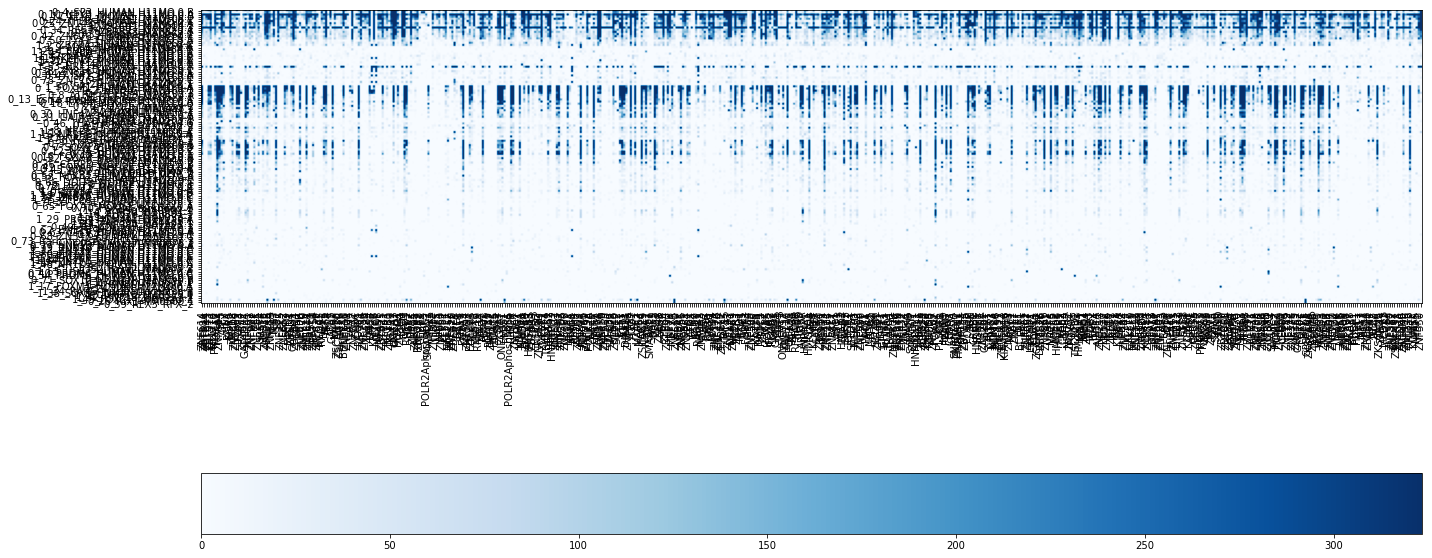

In [33]:
import sklearn.cluster
import scipy.cluster.hierarchy
import scipy.stats

def cluster_matrix_indices(matrix, num_clusters):
    """
    Clusters matrix using k-means. Always clusters on the first
    axis. Returns the indices needed to optimally order the matrix
    by clusters.
    """
    if len(matrix) == 1:
        # Don't cluster at all
        return np.array([0])

    num_clusters = min(num_clusters, len(matrix))
    
    # Perform k-means clustering
    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters)
    cluster_assignments = kmeans.fit_predict(matrix)

    # Perform hierarchical clustering on the cluster centers to determine optimal ordering
    kmeans_centers = kmeans.cluster_centers_
    cluster_order = scipy.cluster.hierarchy.leaves_list(
        scipy.cluster.hierarchy.optimal_leaf_ordering(
            scipy.cluster.hierarchy.linkage(kmeans_centers, method="centroid"), kmeans_centers
        )
    )

    # Order the peaks so that the cluster assignments follow the optimal ordering
    cluster_inds = []
    for cluster_id in cluster_order:
        cluster_inds.append(np.where(cluster_assignments == cluster_id)[0])
    cluster_inds = np.concatenate(cluster_inds)
    return cluster_inds

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Create a figure with the right dimensions
fig, ax = plt.subplots(figsize=(20, 16))


 
inds = cluster_matrix_indices(motif_chip_pval_matrix,10)

zero_mask = motif_chip_pval_matrix == 0
min_val = np.min(motif_chip_pval_matrix[~zero_mask])
motif_chip_pval_matrix[zero_mask] = min_val
logpval_matrix = -np.log10(motif_chip_pval_matrix)
 

hmap = ax.imshow(logpval_matrix[inds], cmap="Blues")


# Set axes on heatmap
ax.set_yticks(np.arange(len(unique_motifs)))
ax.set_yticklabels(np.array(unique_motifs)[inds])
ax.set_xticks(np.arange(len(uniq_tfs)))
ax.set_xticklabels(np.array(uniq_tfs), rotation=90)

fig.colorbar(hmap, orientation="horizontal")

fig.tight_layout()
    

plt.show()

In [34]:

from statsmodels.sandbox.stats.multicomp import multipletests



0_0_CTCF_MA0139.1
['CTCF' 'STAG1' 'SMC3' 'RAD21' 'XRCC5']
0_1_FOXM1_HUMAN.H11MO.0.A
['FOXA1' 'FOXA2' 'SMARCE1' 'FOXP1' 'FOXA3']
0_2_HNF4G_MA0484.1
['SYNCRIP' 'HNF4A' 'HNF4G' 'KDM6A' 'SMARCC2']
0_3_ATF3_MOUSE.H11MO.0.A
['NFE2L2' 'NFE2' 'JUND' 'FOSL2' 'MAFG']
0_4_SP3_HUMAN.H11MO.0.B
['GPBP1L1' 'SP5' 'SP2' 'SP1' 'DRAP1']
0_5_CEBPA_MA0102.3
['CEBPB' 'HLF' 'ATM' 'CEBPG' 'CEBPD']
0_6_TEAD3_MA0808.1
['TEAD4' 'TEAD1' 'ETS1' 'JUN' 'SMARCC2']
0_7_SOX9_HUMAN.H11MO.0.B
['SRSF9' 'SOX13' 'SOX5' 'TCF7' 'SOX6']
0_8_ATF4_MOUSE.H11MO.0.A
['ATF4' 'CEBPB' 'CEBPG' 'CEBPD' 'CEBPA']
0_9_HNF1B_MA0153.2
['HNRNPUL1' 'HNF1A' 'SRSF9' 'ARID3A' 'KAT2B']
0_10_NFYB_HUMAN.H11MO.0.A
['IRF3' 'NFYB' 'NFYC' 'CEBPZ' 'NFYA']
0_11_TCF7L2_MA0523.1
['TCF7' 'TCF7L2' 'IKZF1' 'ARNT' 'ZNF382']
0_12_NFIA_HUMAN.H11MO.0.C
['NFIA' 'NFIC' 'HMGA1' 'LCORL' 'CEBPZ']
0_13_Esrra.mouse_nuclearreceptor_1
['SRSF9' 'NR5A1' 'NR2F1' 'NR2F2' 'NR2F6']
0_14_RXRA_MOUSE.H11MO.0.A
['NR5A1' 'NR2F1' 'RARA' 'NR2F6' 'HNF4A']
0_15_POU5F1_MA1115.1
['SRSF9' '

['HMGA1' 'CEBPZ' 'IRF3' 'PBX2' 'ZNF101']
1_48_NR1D2_MOUSE.H11MO.0.A
['SMARCC2' 'RAD51' 'HLF' 'FIP1L1' 'MBD4']
1_49_FOXC1_forkhead_2
['ZNF17' 'KAT2B' 'NCOA5' 'HNRNPUL1' 'CHD4']
1_50_SP1_HUMAN.H11MO.0.A
['ZBTB7A' 'ZBTB7B' 'GMEB2' 'ZBTB40' 'ZNF33A']
1_51_TEAD1_MA0090.2
['IRF1' 'ATAD3A' 'ZNF570' 'E2F2' 'ZNF30']
1_52_Foxa2_MA0047.2
['RFX1' 'RFX3' 'NCOA5' 'ZNF720' 'U2AF2']
1_53_NRF1_HUMAN.H11MO.0.A
['NRF1' 'ZNF597' 'ZNF778' 'ZNF570' 'PREB']
1_55_USF2_HUMAN.H11MO.0.A
['RAD51' 'USF2' 'ZNF432' 'ZNF597' 'SUZ12']
1_56_CUX2_CUT_1
['KAT2B' 'MBD4' 'ZNF490' 'HHEX' 'MEF2A']


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.


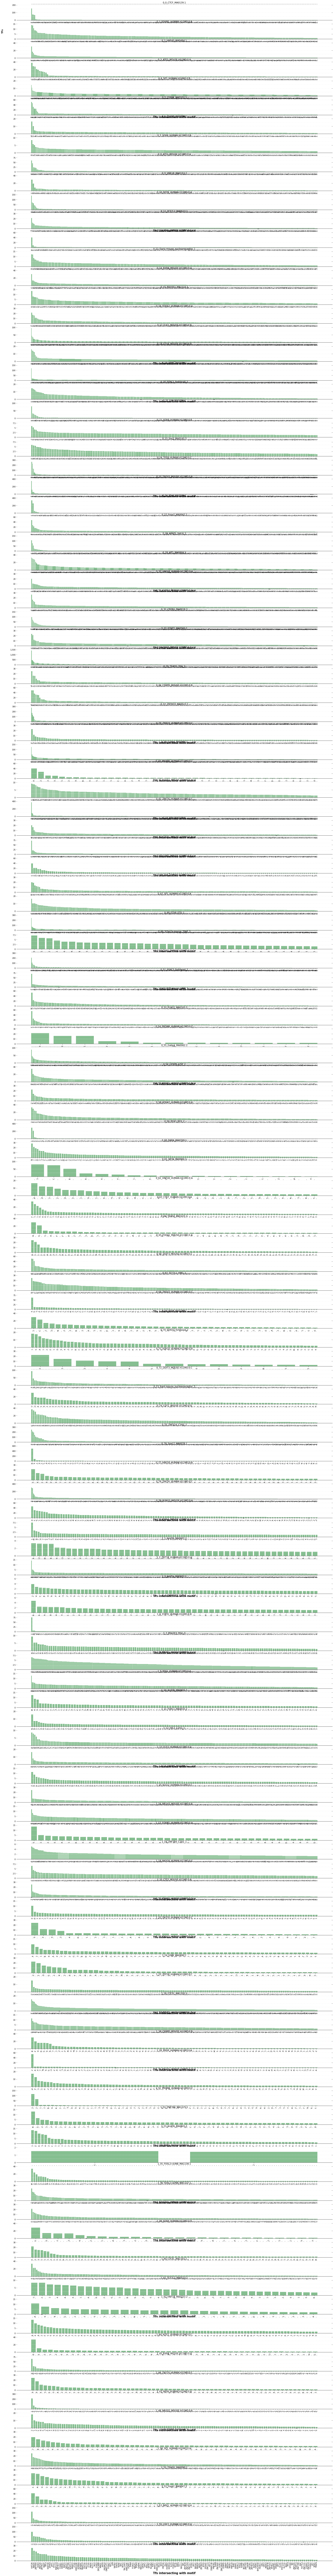

In [35]:
fig, axs = plt.subplots(len(unique_motifs),figsize=(30,250))
from matplotlib.ticker import StrMethodFormatter


for i in range(len(unique_motifs)):
    print(unique_motifs[i])
    p_adjusted = multipletests(motif_chip_pval_matrix[i,:], method='fdr_bh')
    idxs = np.argsort(odds_ratio[i,np.array(p_adjusted[0])])[::-1]
 
    ax = axs[i]
    tfs = np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs]
    counts = odds_ratio[i,np.array(p_adjusted[0])][idxs]
    ax.bar(tfs, counts,color="#86bf91")
    ax.set_xticks(tfs,rotation='vertical')

    #ax.set_ylabel('odds ratio')
    #ax.set_ylabel('TFs significantly co-occuring with motif')

    ax.set_title(unique_motifs[i])

    print(np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs][0:5])
    #print(odds_ratio[i,np.array(p_adjusted[0])][idxs][-5:])
    
for i,x in enumerate(axs):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Tfs intersecting with motif", weight='bold', size=15)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("TFs", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=90)
#plt.show()
plt.tight_layout()
plt.savefig(mode+"_histplot.pdf")


In [ ]:
motif_chip_pval_matrix[1,:]

In [ ]:
frames=[]
for i in range(len(unique_motifs)):
    print(unique_motifs[i])
    
    p_adjusted = multipletests(motif_chip_pval_matrix[i,:], method='fdr_bh')
    idxs = np.argsort(odds_ratio[i,np.array(p_adjusted[0])])[::-1]
 
    ax = axs[i]
    tfs = np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs]
    counts = odds_ratio[i,np.array(p_adjusted[0])][idxs]

    new = []
    new.append(unique_motifs[i])
    new.extend(np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs][0:10].tolist())
    frames.append(new)
    #ax.set_ylabel('odds ratio')
    #ax.set_ylabel('TFs significantly co-occuring with motif')

    print(np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs][0:5])

outdf = pd.DataFrame(frames)
outdf.to_csv(mode+"_top10.tsv", sep='\t', header=False, index=False)

In [ ]:
unique_motifs

In [ ]:
# data={}
# data["pval"] = motif_chip_pval_matrix
# data["odds"] = odds_ratio
# data["motif_names"] = unique_motifs
# data["tf_names"] = uniq_tfs

# import pickle as pkl
# ft = open("saving_pvals.pkl","wb")
# pkl.dump(data,ft)